In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [16]:
housing=fetch_california_housing()
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [17]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [21]:
model=keras.models.Sequential([keras.layers.Dense(50,activation="relu",input_shape=x_train.shape[1:]),
                               keras.layers.Dense(20,activation="relu"),
                              keras.layers.Dense(1)])
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                450       
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 1.1852 - accuracy: 0.0028 - val_loss: 0.5449 - val_accuracy: 0.0034
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4554 - accuracy: 0.0028 - val_loss: 0.4298 - val_accuracy: 0.0034
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4048 - accuracy: 0.0027 - val_loss: 0.4052 - val_accuracy: 0.0034
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.0028 - val_loss: 0.3814 - val_accuracy: 0.0034
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.0028 - val_loss: 0.3801 - val_accuracy: 0.0034
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.0028 - val_loss: 0.3790 - val_accuracy: 0.0034
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.0028 - val_loss: 0.3572 - val_accuracy: 0.0034
Epoch 

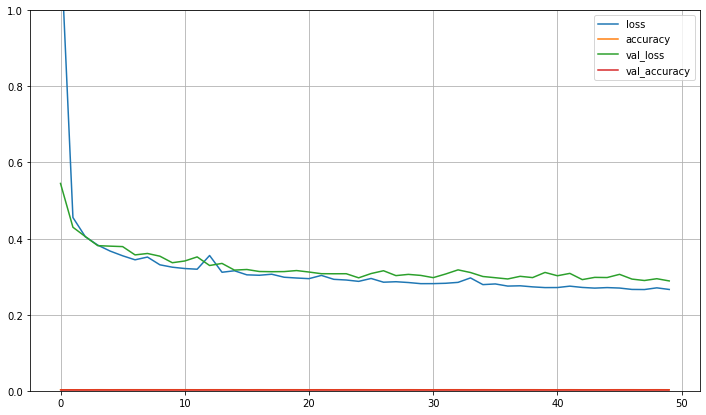

In [25]:
pd.DataFrame(history.history).plot(figsize=(12,7))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()